Plots to include:

Time series of disaster frequency
Loss distribution (histogram + Q-Q plot)
Regional breakdown (pie chart)
Seasonal pattern (monthly bar chart)
Species vulnerability comparison
Heatwave intensity vs. loss (scatter plot)

In [ ]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import sys
sys.path.append('..')

from src.data_generation.reference_data import ReferenceData
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Regions: ['Alaska', 'West Coast', 'Gulf of Mexico', 'Northeast', 'Southeast']

Alaska species: ['Snow Crab', 'King Crab', 'Pacific Cod', 'Pacific Salmon', 'Pollock']

Snow Crab value: 200

Snow Crab disasters: ['Warm ocean conditions', 'Harmful algal bloom']

Snow Crab vulnerability: [0.5, 0.3]
dict_keys(['Alaska', 'West Coast', 'Gulf of Mexico', 'Northeast', 'Southeast'])


In [ ]:
# Cell 2: Test basic access
print("Regions:", ReferenceData.get_all_regions())
print("\nAlaska species:", ReferenceData.get_species_for_region('Alaska'))
print("\nSnow Crab value:", ReferenceData.get_species_value('Alaska', 'Snow Crab'))
print("\nSnow Crab disasters:", ReferenceData.get_species_disasters('Alaska', 'Snow Crab'))
print("\nSnow Crab vulnerability:", ReferenceData.get_species_vulnerability('Alaska', 'Snow Crab'))
print(ReferenceData.SPECIES_BY_REGION.keys())


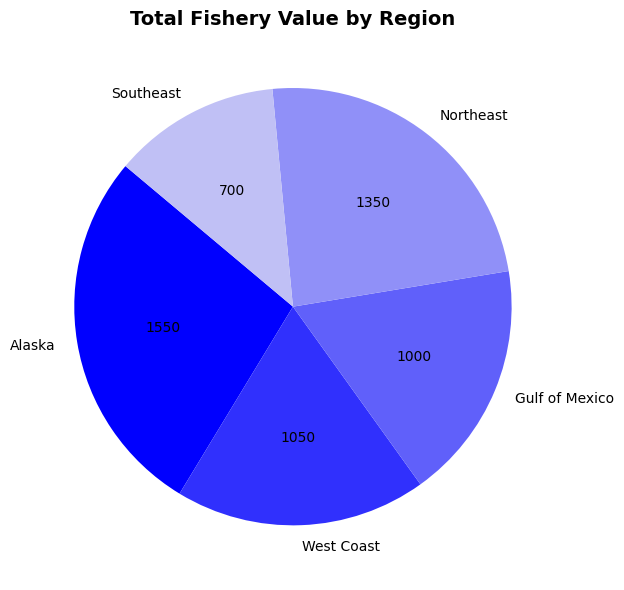

In [ ]:
#Create visualization of total value by region
total_values = ReferenceData.get_total_value_by_region()


def absolute_value(pct, allvals):
    total = sum(allvals)
    val = int(round(pct * total / 100.0))
    return f'{val:d}'  # Format as an integer

plt.figure(figsize=(10, 6))
plt.pie(total_values.values(), labels=total_values.keys(), autopct= lambda pct: absolute_value(pct, total_values.values()), startangle=140, colors=sns.color_palette('light:b_r'))
plt.title('Total Fishery Value by Region', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

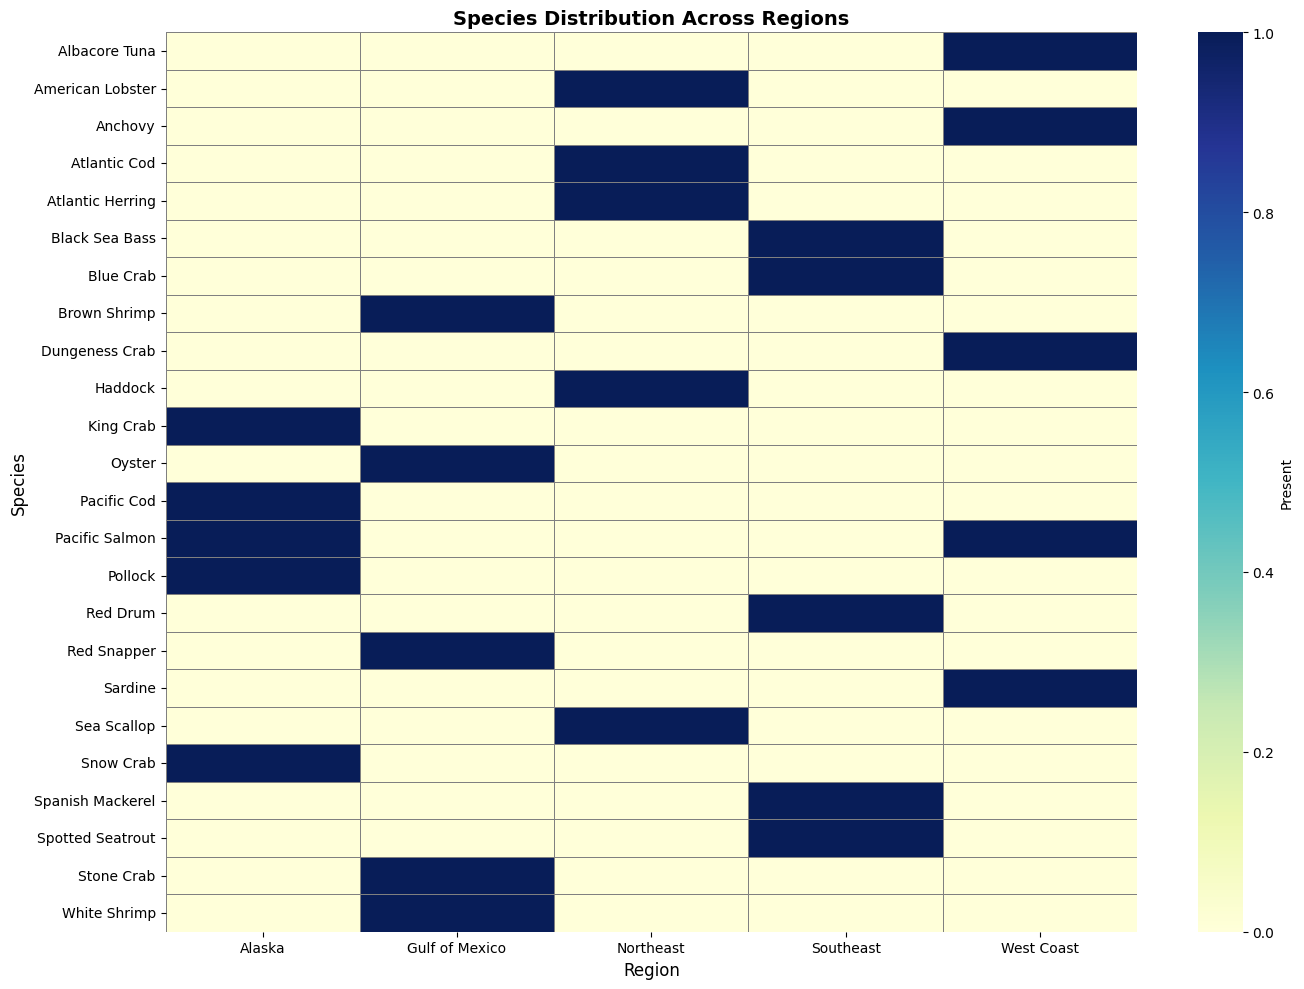

In [39]:
# Cell 4: Create a heatmap of species presence by region
# Create a DataFrame showing which species are in which regions
species_presence = []

for region in ReferenceData.get_all_regions():
    for species in ReferenceData.get_all_species():
        is_present = species in ReferenceData.get_species_for_region(region)
        species_presence.append({
            'Region': region,
            'Species': species,
            'Present': int(is_present)
        })

df_presence = pd.DataFrame(species_presence)
pivot_df = df_presence.pivot(index='Species', columns='Region', values='Present')

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_df, cmap='YlGnBu', cbar_kws={'label': 'Present'}, 
            linewidths=0.5, linecolor='gray')
plt.title('Species Distribution Across Regions', fontsize=14, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Species', fontsize=12)
plt.tight_layout()
plt.show()

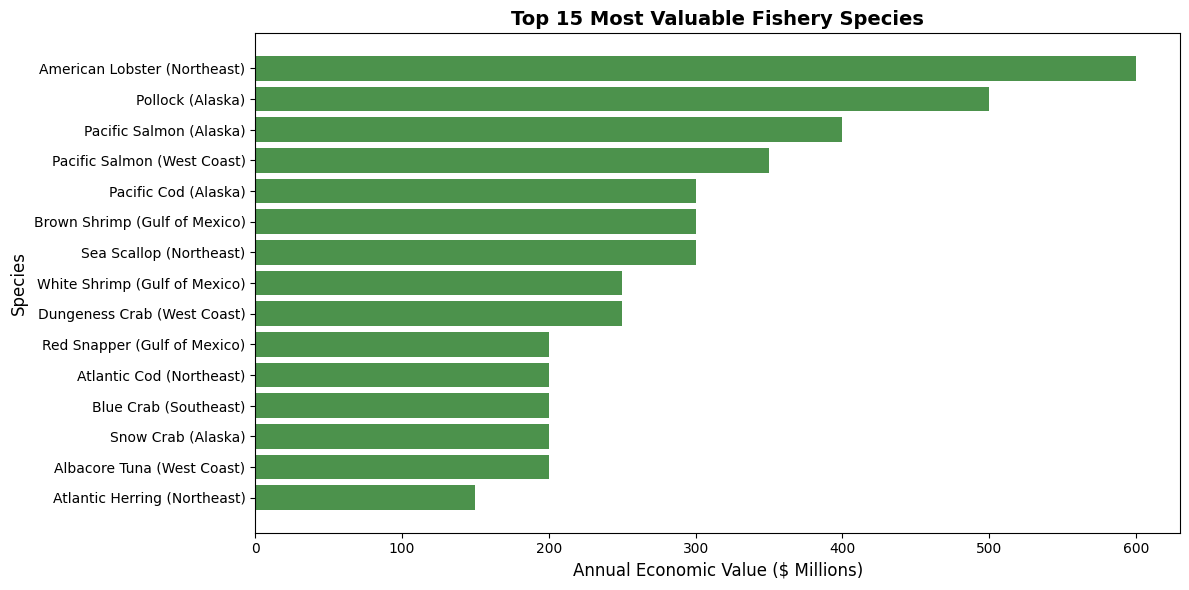

In [51]:
# Cell 5: Visualize species economic value
species_values = []
for region in ReferenceData.get_all_regions():
    for species in ReferenceData.get_species_for_region(region):
        value = ReferenceData.get_species_value(region, species)
        vulnerability = ReferenceData.get_species_vulnerability(region, species)
        species_values.append({
            'Region': region,
            'Species': species,
            'Annual_Value_M': value,
            'Vulnerability': vulnerability
        })


df_values = pd.DataFrame(species_values).sort_values('Annual_Value_M', ascending=False)

# Top 15 most valuable species
top_15 = df_values.head(15)

#cat region and species
top_15.loc[:, 'Species'] = top_15['Species'] + ' (' + top_15['Region'] + ')'

fig, ax = plt.subplots(figsize=(12, 6))
bars = plt.barh(top_15['Species'], top_15['Annual_Value_M'], 
                color='darkgreen', alpha=0.7)
plt.xlabel('Annual Economic Value ($ Millions)', fontsize=12)
plt.ylabel('Species', fontsize=12)
plt.title('Top 15 Most Valuable Fishery Species', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Number of features: 17
Columns in original: ['geometry']

ALL FEATURES SORTED BY AREA:
Feature 0:     1,386.28 km² | Bounds: (-129.2, 30.5) to (-117.1, 49.0)
Feature 4:     1,386.28 km² | Bounds: (-129.2, 30.5) to (-117.1, 49.0)
Feature 8:     1,359.11 km² | Bounds: (-129.2, 30.5) to (-117.1, 48.5)
Feature 7:     1,359.11 km² | Bounds: (-129.2, 30.5) to (-117.1, 48.5)
Feature 6:     1,359.11 km² | Bounds: (-129.2, 30.5) to (-117.1, 48.5)
Feature 10:     1,359.11 km² | Bounds: (-129.2, 30.5) to (-117.1, 48.5)
Feature 9:     1,359.11 km² | Bounds: (-129.2, 30.5) to (-117.1, 48.5)
Feature 5:       891.29 km² | Bounds: (-129.2, 31.1) to (-117.1, 49.0)
Feature 16:       678.44 km² | Bounds: (-127.1, 31.3) to (-117.1, 48.5)
Feature 3:       344.95 km² | Bounds: (-126.4, 31.2) to (-117.1, 49.0)
Feature 2:       344.95 km² | Bounds: (-126.4, 31.2) to (-117.1, 49.0)
Feature 12:       315.69 km² | Bounds: (-125.4, 30.5) to (-117.1, 34.6)
Feature 11:       315.69 km² | Bounds: (-125.4, 30.5) to (

C:\Users\nmorok\AppData\Local\Temp\ipykernel_23544\1497328951.py:73: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
C:\Users\nmorok\AppData\Local\Temp\ipykernel_23544\1497328951.py:73: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


✓ Saved: all_efh_features.png


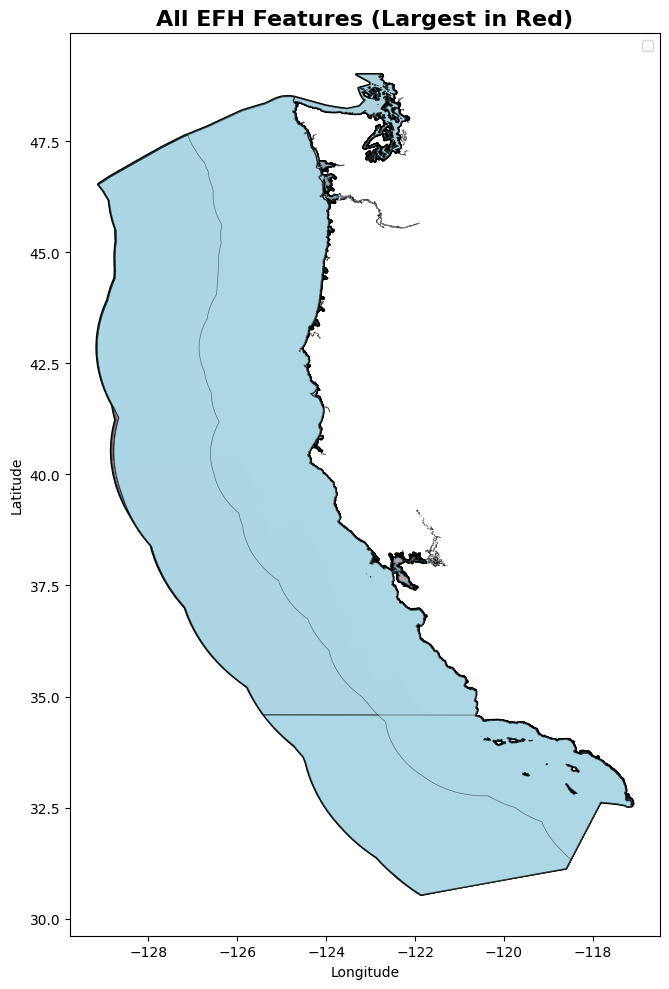

In [56]:
import xarray as xr
from erddapy import ERDDAP
import matplotlib.pyplot as plt
import geopandas as gpd
import regionmask
import os

os.environ['SHAPE_RESTORE_SHX'] = 'YES'

# Read shapefile
gdf = gpd.read_file('c:\\Users\\nmorok\\Documents\\Thesis\\fishery-risk-platform\\data\\EFH.shp')

if gdf.crs is None:
    gdf = gdf.set_crs('EPSG:3857')

print(f"Number of features: {len(gdf)}")
print(f"Columns in original: {gdf.columns.tolist()}")

# Convert to WGS84
gdf_wgs84 = gdf.to_crs('EPSG:4326')

# Calculate area for each polygon (in original CRS for accuracy)
gdf['area_m2'] = gdf.geometry.area
gdf_wgs84['area_m2'] = gdf['area_m2'].values  # Copy area column

# Show all features sorted by area
print("\n" + "="*70)
print("ALL FEATURES SORTED BY AREA:")
print("="*70)
gdf_sorted = gdf_wgs84.sort_values('area_m2', ascending=False).reset_index()

for idx, row in gdf_sorted.iterrows():
    original_idx = row['index']
    area_km2 = row['area_m2'] / 1e9
    bounds = row.geometry.bounds  # minx, miny, maxx, maxy
    print(f"Feature {original_idx}: {area_km2:>12,.2f} km² | "
          f"Bounds: ({bounds[0]:.1f}, {bounds[1]:.1f}) to ({bounds[2]:.1f}, {bounds[3]:.1f})")

# Select the LARGEST polygon
largest_idx = gdf_wgs84['area_m2'].idxmax()
largest_feature = gdf_wgs84.loc[[largest_idx]]

print("\n" + "="*70)
print("SELECTED LARGEST FEATURE:")
print("="*70)
print(f"Index: {largest_idx}")
print(f"Area: {largest_feature['area_m2'].values[0]/1e9:.2f} km²")

# Get bounds
bounds = largest_feature.total_bounds
lon_min, lat_min, lon_max, lat_max = [float(x) for x in bounds]

print(f"\nBounding box:")
print(f"  Longitude: {lon_min:.2f} to {lon_max:.2f}")
print(f"  Latitude: {lat_min:.2f} to {lat_max:.2f}")

# Visualize all features to help you choose
print("\nCreating visualization of all features...")
fig, ax = plt.subplots(figsize=(14, 10))

# Plot all features with different colors
for idx, row in gdf_wgs84.iterrows():
    color = 'red' if idx == largest_idx else 'lightblue'
    linewidth = 2 if idx == largest_idx else 0.5
    alpha = 1.0 if idx == largest_idx else 0.5
    gpd.GeoSeries([row.geometry]).plot(ax=ax, facecolor=color, 
                                       edgecolor='black', linewidth=linewidth, 
                                       alpha=alpha, label=f'Feature {idx}' if idx == largest_idx else None)

ax.set_title('All EFH Features (Largest in Red)', fontsize=16, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()
plt.tight_layout()
plt.savefig('all_efh_features.png', dpi=300, bbox_inches='tight')
print("✓ Saved: all_efh_features.png")
plt.show()

READING SHAPEFILE
Setting CRS to EPSG:3857 (Web Mercator)
Number of features: 17
Columns: ['geometry']

ALL FEATURES SORTED BY AREA:
Feature 0:     1,386.28 km² | Bounds: (-129.2, 30.5) to (-117.1, 49.0)
Feature 4:     1,386.28 km² | Bounds: (-129.2, 30.5) to (-117.1, 49.0)
Feature 8:     1,359.11 km² | Bounds: (-129.2, 30.5) to (-117.1, 48.5)
Feature 7:     1,359.11 km² | Bounds: (-129.2, 30.5) to (-117.1, 48.5)
Feature 6:     1,359.11 km² | Bounds: (-129.2, 30.5) to (-117.1, 48.5)
Feature 10:     1,359.11 km² | Bounds: (-129.2, 30.5) to (-117.1, 48.5)
Feature 9:     1,359.11 km² | Bounds: (-129.2, 30.5) to (-117.1, 48.5)
Feature 5:       891.29 km² | Bounds: (-129.2, 31.1) to (-117.1, 49.0)
Feature 16:       678.44 km² | Bounds: (-127.1, 31.3) to (-117.1, 48.5)
Feature 3:       344.95 km² | Bounds: (-126.4, 31.2) to (-117.1, 49.0)
Feature 2:       344.95 km² | Bounds: (-126.4, 31.2) to (-117.1, 49.0)
Feature 12:       315.69 km² | Bounds: (-125.4, 30.5) to (-117.1, 34.6)
Feature 11: 

C:\Users\nmorok\AppData\Local\Temp\ipykernel_23544\1124368889.py:100: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
C:\Users\nmorok\AppData\Local\Temp\ipykernel_23544\1124368889.py:100: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


✓ Saved: all_efh_features.png


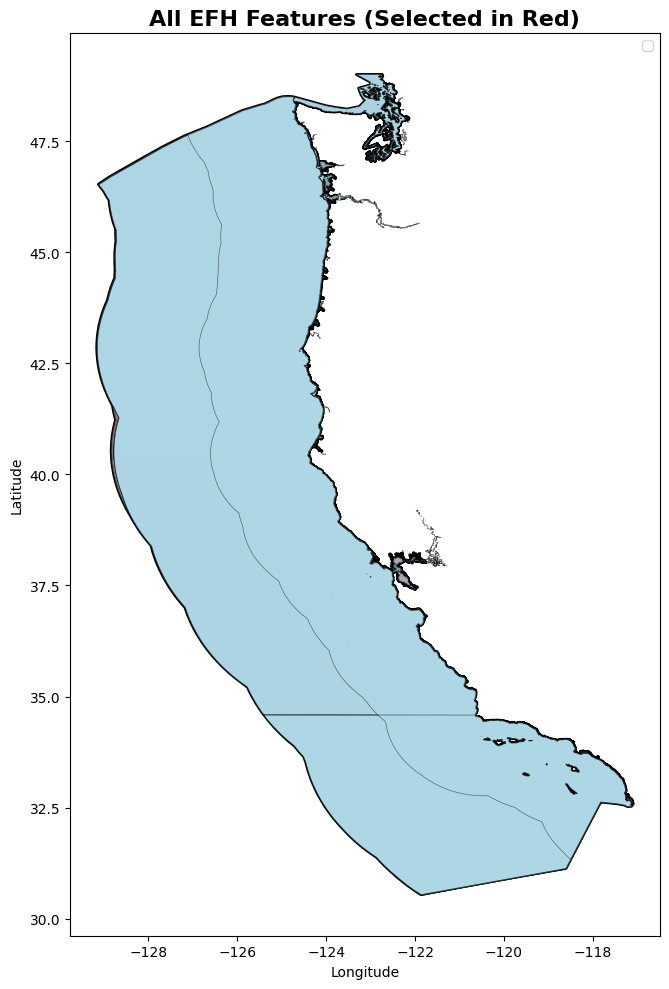


DOWNLOADING SST DATA FROM ERDDAP
✓ Downloaded successfully
Dataset dimensions: {'time': 31, 'zlev': 1, 'latitude': 75, 'longitude': 49}
Variables: ['sst', 'anom']

MASKING DATA TO SELECTED FEATURE
Creating spatial mask...
Applying mask...
✓ Masked successfully
Grid points inside feature: 1368 / 3675 (37.2%)
✓ Saved masked data: efh_sst_2023_masked.nc

CREATING VISUALIZATIONS


C:\Users\nmorok\AppData\Local\Temp\ipykernel_23544\1124368889.py:134: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(f"Dataset dimensions: {dict(ds.dims)}")


✓ Saved: efh_sst_comparison.png


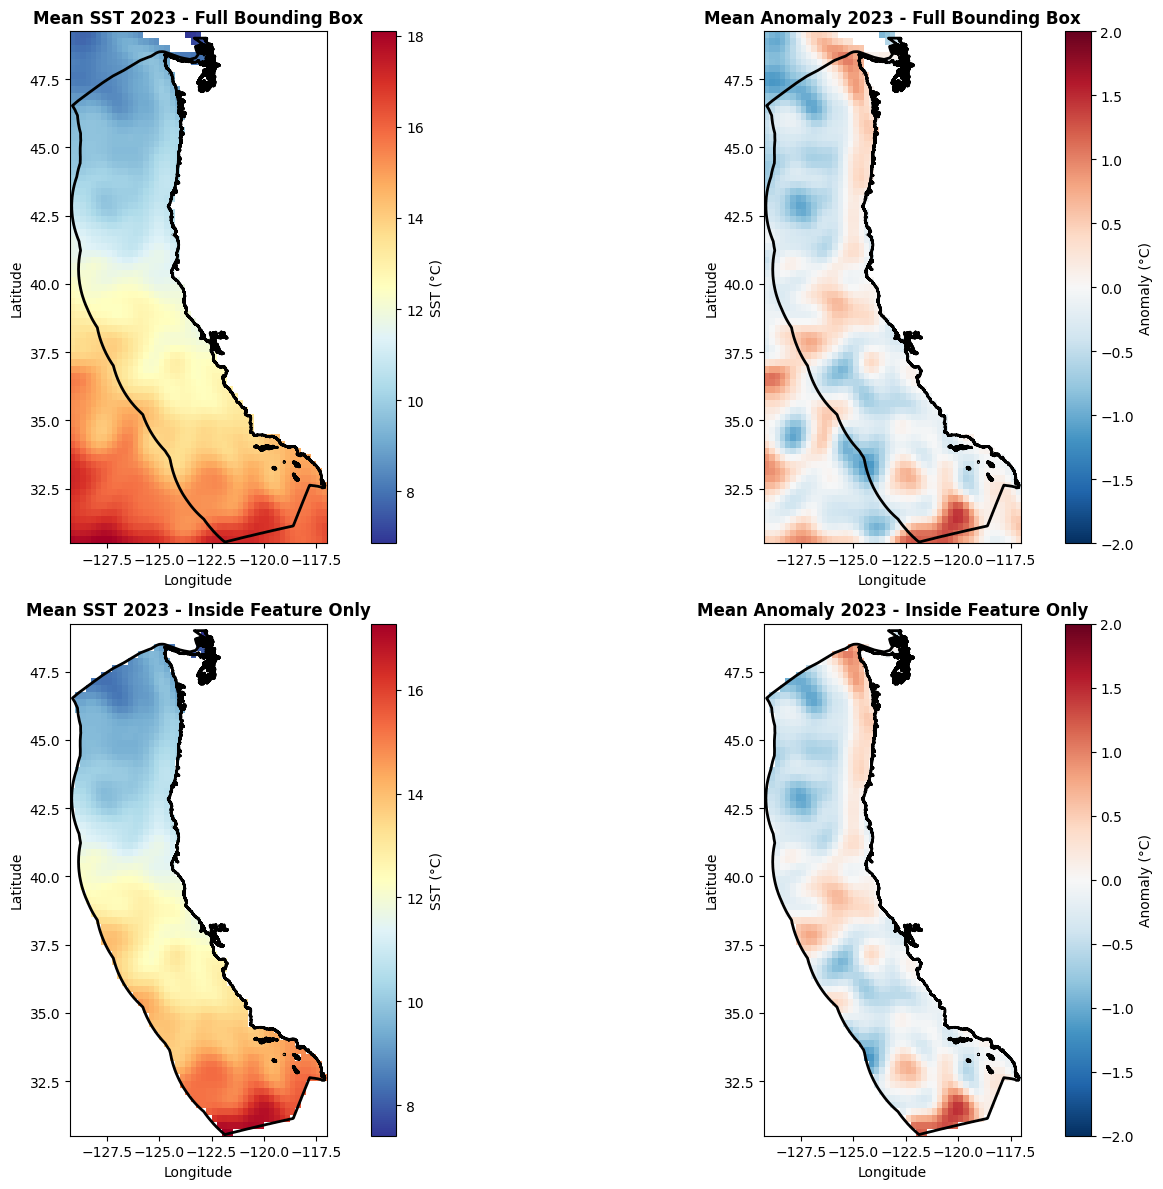


STATISTICS - FEATURE 0
Mean SST: 12.19°C
Max SST: 17.76°C
Min SST: 7.05°C
Mean Anomaly: -0.09°C

Creating time series...
✓ Saved: efh_sst_timeseries.png


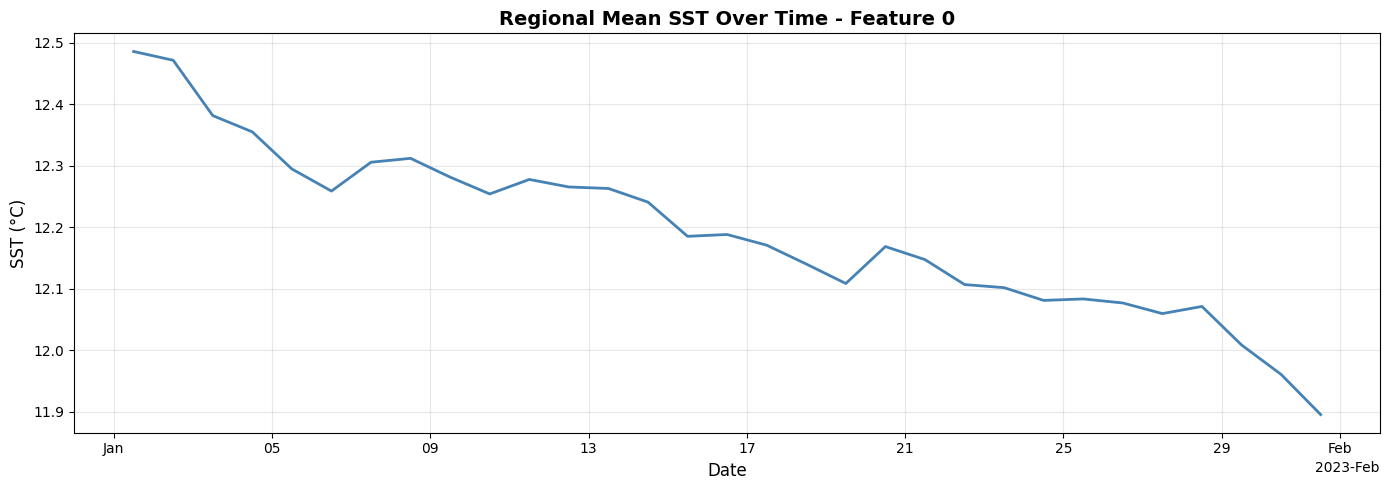


COMPLETE!
Files created:
  1. all_efh_features.png - Overview of all 17 features
  2. efh_sst_2023_masked.nc - NetCDF with SST data inside feature
  3. efh_sst_comparison.png - Before/after masking comparison
  4. efh_sst_timeseries.png - Time series of regional mean SST

Data summary:
  - Selected feature: 0
  - Area: 1386.28 km²
  - Time period: 2023
  - Grid points in feature: 1368
  - Mean SST: 12.19°C


In [58]:
import xarray as xr
from erddapy import ERDDAP
import matplotlib.pyplot as plt
import geopandas as gpd
import regionmask
import os

os.environ['SHAPE_RESTORE_SHX'] = 'YES'

# ============================================================================
# PART 1: READ AND EXPLORE SHAPEFILE
# ============================================================================

print("="*70)
print("READING SHAPEFILE")
print("="*70)

# Read shapefile
gdf = gpd.read_file('c:\\Users\\nmorok\\Documents\\Thesis\\fishery-risk-platform\\data\\EFH.shp')

if gdf.crs is None:
    print("Setting CRS to EPSG:3857 (Web Mercator)")
    gdf = gdf.set_crs('EPSG:3857')

print(f"Number of features: {len(gdf)}")
print(f"Columns: {gdf.columns.tolist()}")

# Convert to WGS84
gdf_wgs84 = gdf.to_crs('EPSG:4326')

# Calculate area for each polygon
gdf['area_m2'] = gdf.geometry.area
gdf_wgs84['area_m2'] = gdf['area_m2'].values

# Show all features sorted by area
print("\n" + "="*70)
print("ALL FEATURES SORTED BY AREA:")
print("="*70)
gdf_sorted = gdf_wgs84.sort_values('area_m2', ascending=False).reset_index()

for idx, row in gdf_sorted.iterrows():
    original_idx = row['index']
    area_km2 = row['area_m2'] / 1e9
    bounds = row.geometry.bounds
    print(f"Feature {original_idx}: {area_km2:>12,.2f} km² | "
          f"Bounds: ({bounds[0]:.1f}, {bounds[1]:.1f}) to ({bounds[2]:.1f}, {bounds[3]:.1f})")

# ============================================================================
# PART 2: SELECT FEATURE
# ============================================================================

# Select the LARGEST polygon (or change this to select a different one)
largest_idx = gdf_wgs84['area_m2'].idxmax()
selected_feature = gdf_wgs84.loc[[largest_idx]]

# To select a different feature, uncomment and modify this:
# selected_idx = 1  # Change to any index 0-16
# selected_feature = gdf_wgs84.loc[[selected_idx]]
# largest_idx = selected_idx

print("\n" + "="*70)
print("SELECTED FEATURE:")
print("="*70)
print(f"Index: {largest_idx}")
print(f"Area: {selected_feature['area_m2'].values[0]/1e9:.2f} km²")

# Get bounds
bounds = selected_feature.total_bounds
lon_min, lat_min, lon_max, lat_max = [float(x) for x in bounds]

print(f"\nBounding box:")
print(f"  Longitude: {lon_min:.2f} to {lon_max:.2f}")
print(f"  Latitude: {lat_min:.2f} to {lat_max:.2f}")

# ============================================================================
# PART 3: VISUALIZE ALL FEATURES
# ============================================================================

print("\nCreating visualization of all features...")
fig, ax = plt.subplots(figsize=(14, 10))

# Plot all features
for idx, row in gdf_wgs84.iterrows():
    color = 'red' if idx == largest_idx else 'lightblue'
    linewidth = 2 if idx == largest_idx else 0.5
    alpha = 1.0 if idx == largest_idx else 0.5
    gpd.GeoSeries([row.geometry]).plot(
        ax=ax, 
        facecolor=color, 
        edgecolor='black', 
        linewidth=linewidth, 
        alpha=alpha, 
        label=f'Selected: Feature {idx}' if idx == largest_idx else None
    )

ax.set_title('All EFH Features (Selected in Red)', fontsize=16, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
if largest_idx is not None:
    ax.legend()
plt.tight_layout()
plt.savefig('all_efh_features.png', dpi=300, bbox_inches='tight')
print("✓ Saved: all_efh_features.png")
plt.show()

# ============================================================================
# PART 4: DOWNLOAD SST DATA
# ============================================================================

print("\n" + "="*70)
print("DOWNLOADING SST DATA FROM ERDDAP")
print("="*70)

e = ERDDAP(
    server="https://coastwatch.pfeg.noaa.gov/erddap",
    protocol="griddap"
)
e.dataset_id = "ncdcOisst21Agg_LonPM180"
e.griddap_initialize()

e.constraints.update({
    "time>=": "2023-01-01T00:00:00Z",
    "time<=": "2023-01-31T00:00:00Z",
    "latitude>=": lat_min,
    "latitude<=": lat_max,
    "longitude>=": lon_min,
    "longitude<=": lon_max,
})
e.variables = ["sst", "anom"]

print("Downloading (this may take a minute)...")
ds = e.to_xarray()
print("✓ Downloaded successfully")
print(f"Dataset dimensions: {dict(ds.dims)}")
print(f"Variables: {list(ds.data_vars)}")

# ============================================================================
# PART 5: MASK DATA TO SELECTED FEATURE
# ============================================================================

print("\n" + "="*70)
print("MASKING DATA TO SELECTED FEATURE")
print("="*70)

print("Creating spatial mask...")
mask = regionmask.mask_geopandas(selected_feature, ds.longitude, ds.latitude)

print("Applying mask...")
ds_masked = ds.where(mask.notnull())

valid_points = ds_masked.sst.isel(time=0).notnull().sum().values
total_points = ds.sst.isel(time=0).size
print(f"✓ Masked successfully")
print(f"Grid points inside feature: {valid_points} / {total_points} ({100*valid_points/total_points:.1f}%)")

# ============================================================================
# PART 6: SAVE MASKED DATA
# ============================================================================

output_file = 'efh_sst_2023_masked.nc'
ds_masked.to_netcdf(output_file)
print(f"✓ Saved masked data: {output_file}")

# ============================================================================
# PART 7: CREATE COMPARISON PLOTS
# ============================================================================

print("\n" + "="*70)
print("CREATING VISUALIZATIONS")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Row 1, Col 1: Full bounding box - SST
ax = axes[0, 0]
ds['sst'].mean(dim='time').plot(
    ax=ax, 
    cmap='RdYlBu_r',
    cbar_kwargs={'label': 'SST (°C)'}
)
selected_feature.boundary.plot(ax=ax, edgecolor='black', linewidth=2)
ax.set_title('Mean SST 2023 - Full Bounding Box', fontsize=12, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Row 1, Col 2: Full bounding box - Anomaly
ax = axes[0, 1]
ds['anom'].mean(dim='time').plot(
    ax=ax, 
    cmap='RdBu_r', 
    vmin=-2, 
    vmax=2,
    cbar_kwargs={'label': 'Anomaly (°C)'}
)
selected_feature.boundary.plot(ax=ax, edgecolor='black', linewidth=2)
ax.set_title('Mean Anomaly 2023 - Full Bounding Box', fontsize=12, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Row 2, Col 1: Masked - SST
ax = axes[1, 0]
ds_masked['sst'].mean(dim='time').plot(
    ax=ax, 
    cmap='RdYlBu_r',
    cbar_kwargs={'label': 'SST (°C)'}
)
selected_feature.boundary.plot(ax=ax, edgecolor='black', linewidth=2)
ax.set_title('Mean SST 2023 - Inside Feature Only', fontsize=12, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Row 2, Col 2: Masked - Anomaly
ax = axes[1, 1]
ds_masked['anom'].mean(dim='time').plot(
    ax=ax, 
    cmap='RdBu_r', 
    vmin=-2, 
    vmax=2,
    cbar_kwargs={'label': 'Anomaly (°C)'}
)
selected_feature.boundary.plot(ax=ax, edgecolor='black', linewidth=2)
ax.set_title('Mean Anomaly 2023 - Inside Feature Only', fontsize=12, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.tight_layout()
plt.savefig('efh_sst_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Saved: efh_sst_comparison.png")
plt.show()

# ============================================================================
# PART 8: CALCULATE STATISTICS
# ============================================================================

print("\n" + "="*70)
print(f"STATISTICS - FEATURE {largest_idx}")
print("="*70)

mean_sst = ds_masked['sst'].mean().values
max_sst = ds_masked['sst'].max().values
min_sst = ds_masked['sst'].min().values
mean_anom = ds_masked['anom'].mean().values

print(f"Mean SST: {mean_sst:.2f}°C")
print(f"Max SST: {max_sst:.2f}°C")
print(f"Min SST: {min_sst:.2f}°C")
print(f"Mean Anomaly: {mean_anom:.2f}°C")

# ============================================================================
# PART 9: CREATE TIME SERIES
# ============================================================================

print("\nCreating time series...")
regional_mean = ds_masked['sst'].mean(dim=['latitude', 'longitude'])

fig, ax = plt.subplots(figsize=(14, 5))
regional_mean.plot(ax=ax, linewidth=2, color='steelblue')
ax.set_title(f'Regional Mean SST Over Time - Feature {largest_idx}', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('SST (°C)', fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('efh_sst_timeseries.png', dpi=300, bbox_inches='tight')
print("✓ Saved: efh_sst_timeseries.png")
plt.show()

# ============================================================================
# SUMMARY
# ============================================================================

print("\n" + "="*70)
print("COMPLETE!")
print("="*70)
print("Files created:")
print("  1. all_efh_features.png - Overview of all 17 features")
print("  2. efh_sst_2023_masked.nc - NetCDF with SST data inside feature")
print("  3. efh_sst_comparison.png - Before/after masking comparison")
print("  4. efh_sst_timeseries.png - Time series of regional mean SST")
print("\nData summary:")
print(f"  - Selected feature: {largest_idx}")
print(f"  - Area: {selected_feature['area_m2'].values[0]/1e9:.2f} km²")
print(f"  - Time period: 2023")
print(f"  - Grid points in feature: {valid_points}")
print(f"  - Mean SST: {mean_sst:.2f}°C")

c:\Users\nmorok\Documents\Thesis\fishery-risk-platform\notebooks


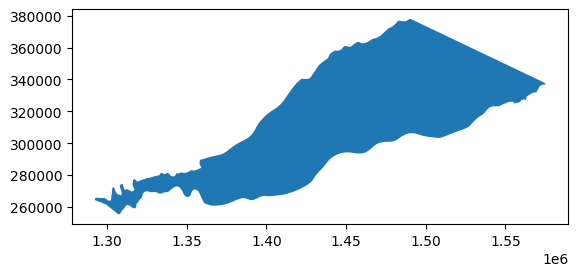

Number of features: 1
Columns in original: ['OBJECTID', 'AREA', 'PERIMETER', 'ACRE', 'HECTARE', 'Shape_Leng', 'Shape_Area', 'geometry']


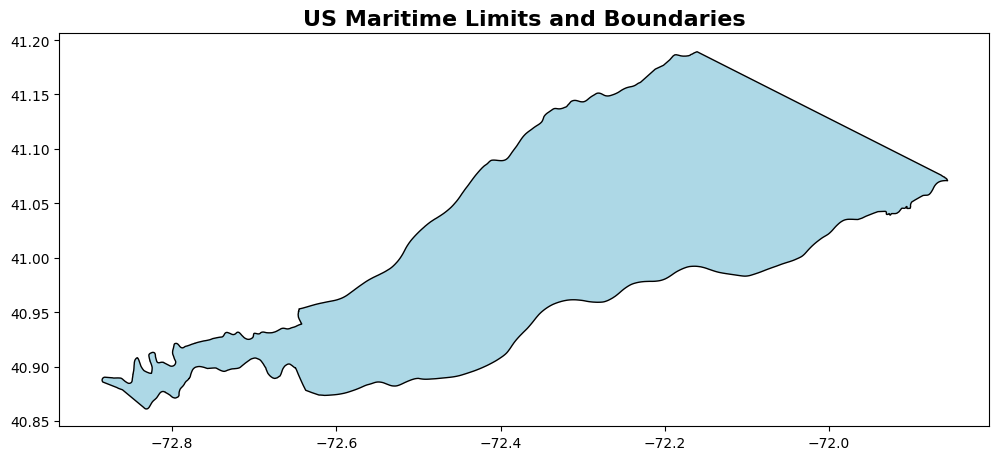

In [81]:
import xarray as xr
from erddapy import ERDDAP
import matplotlib.pyplot as plt
import geopandas as gpd
import regionmask
import os



print(os.getcwd())
gdf = gpd.read_file("../src/climate/shapefiles/Peconic_Estuary_Program_Boundary.shp")
gdf.plot()
plt.show()


#url = "https://services1.arcgis.com/HVreyEzQWRewq33m/arcgis/rest/services/Alaska_IPHC_RegAreas_WebMerc/FeatureServer/59/query?where=1%3D1&outFields=*&f=geojson"
#gdf = gpd.read_file(url)
#gdf.to_file("Alaska_EEZ.shp")



print(f"Number of features: {len(gdf)}")
print(f"Columns in original: {gdf.columns.tolist()}")

# Convert to WGS84
gdf_wgs84 = gdf.to_crs('EPSG:4326')

# plot all of the shapes no matter the size
gdf_wgs84.plot(figsize=(12, 8), edgecolor='black', facecolor='lightblue')
plt.title('US Maritime Limits and Boundaries', fontsize=16, fontweight='bold')
plt.show()
